In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [43]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

In [3]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

In [33]:
df = df[df['predstih_h'] <= 4]
df = df[df['predstih_h'] >= 0]

In [25]:
prgova = df[df['odkud'].str.contains('Pra') & df['kam'].str.contains('Ostra')]

In [27]:
ovaprg = df[df['odkud'].str.contains('Ostra') & df['kam'].str.contains('Pra')]

<Axes: xlabel='obdobi'>

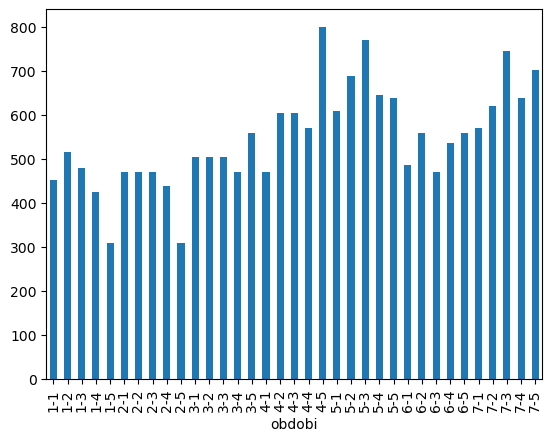

In [29]:
prgova.groupby('obdobi')['cena'].median().plot.bar()

<Axes: xlabel='obdobi'>

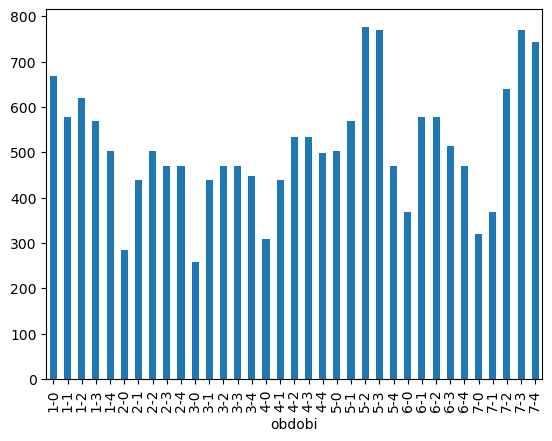

In [31]:
ovaprg.groupby('obdobi')['cena'].median().plot.bar()

In [41]:
df.groupby('obdobi')['cena'].median().nlargest()

obdobi
4-5    799.0
5-3    769.0
7-3    759.0
7-5    701.5
5-2    689.0
Name: cena, dtype: float64

In [37]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(20)

obdobi
7-3     1.00
5-2     7.00
5-3     8.00
7-4    11.60
5-1    13.88
4-3    21.00
3-2    28.00
5-5    28.00
7-2    28.18
3-3    30.00
7-5    30.00
1-0    30.66
6-2    32.51
5-4    32.56
4-5    33.00
4-2    34.00
1-2    34.36
4-4    34.44
6-1    34.55
2-0    34.81
Name: volnych_mist, dtype: float64

In [39]:
spicka = df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(4).index.to_list()

In [144]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
df = df[df['odjezd'] >= '2024-11-08']
df = df[df['prostredek'] != 'autobus']
df = df[df['prestupy'] == 0]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

Nejdelší započítané spojení: 216 minut.


In [146]:
df = df[df['predstih_h'] >= 0]

In [148]:
df['predstih_d2'] = df['predstih_h'] / 24

In [150]:
df.sample(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_d2
441915,2024-11-15 13:57:53,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-09 09:10:00,23 days 19:12:07,23,571.201944,504.0,vlak,NaN,[Předpokládané nízké obsazení],189.0,356.0,[0],None,po,0,[IC 510 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD po 09:10,1-2,23.800081
629750,2024-11-20 08:19:34,LE,Ostrava hl.n.,Praha hl.n.,2024-12-17 08:58:00,27 days 00:38:26,27,648.640556,199.0,None,65.0,None,209.0,356.0,None,None,út,0,[LE1252],None,None,21.0,19.0,19.0,6.0,LE út 08:58,2-2,27.026690
188009,2024-11-09 06:09:11,RJ,Praha,Ostrava,2024-11-09 15:50:00,0 days 09:40:49,0,9.680278,369.0,vlak,130.0,None,191.0,NaN,None,None,so,0,None,None,None,NaN,NaN,NaN,NaN,RJ so 15:50,6-3,0.403345
470183,2024-11-16 08:16:45,LE,Praha hl.n.,Ostrava hl.n.,2024-11-20 16:00:00,4 days 07:43:15,4,103.720833,479.0,None,33.0,None,211.0,356.0,None,None,st,0,[LE413],None,None,21.0,5.0,5.0,2.0,LE st 16:00,3-4,4.321701
422575,2024-11-15 00:05:19,RJ,Praha,Ostrava,2024-11-17 16:50:00,2 days 16:44:41,2,64.744722,579.0,vlak,9.0,None,191.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 16:50,7-4,2.697697
503927,2024-11-17 00:17:17,RJ,Ostrava,Praha,2024-12-04 08:53:00,17 days 08:35:43,17,416.595278,369.0,vlak,180.0,None,194.0,NaN,None,None,st,0,None,None,None,NaN,NaN,NaN,NaN,RJ st 08:53,3-2,17.358137
260421,2024-11-10 19:22:03,LE,Ostrava hl.n.,Praha hl.n.,2024-12-04 03:56:00,23 days 08:33:57,23,560.565833,199.0,None,52.0,None,212.0,356.0,None,None,st,0,[LE1250],None,None,21.0,15.0,16.0,0.0,LE st 03:56,3-0,23.356910
196015,2024-11-09 10:05:18,ČD,Praha hl.n.,Ostrava hl.n.,2025-01-31 20:22:00,83 days 10:16:42,83,2002.278333,NaN,vlak,NaN,[Předpokládané nízké obsazení],206.0,356.0,[0],None,pá,0,[IC 549 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD pá 20:22,5-5,83.428264
573117,2024-11-18 21:46:53,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-26 12:19:00,7 days 14:32:07,7,182.535278,369.0,vlak,NaN,[Předpokládané nízké obsazení],209.0,356.0,[0],None,út,0,[EC 143 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD út 12:19,2-3,7.605637
391305,2024-11-14 07:57:12,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-13 04:03:00,28 days 20:05:48,28,692.096667,289.0,vlak,NaN,[Předpokládané nízké obsazení],195.0,356.0,[0],None,pá,0,[IC 518 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 04:03,5-1,28.837361


In [244]:
cd2 = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60) & (df['prodejce'] == "ČD")].groupby(['predstih_d','cena']).size().reset_index()
cd2 = cd2.groupby('predstih_d').apply(lambda x: list(zip(x['cena'], x[0])))
cd2

C:\Users\micha\AppData\Local\Temp\ipykernel_3368\716896998.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cd2 = cd2.groupby('predstih_d').apply(lambda x: list(zip(x['cena'], x[0])))


predstih_d
0     [(535.0, 5), (569.0, 4), (609.0, 90), (619.0, ...
1     [(535.0, 3), (569.0, 27), (604.0, 8), (609.0, ...
2     [(535.0, 15), (569.0, 26), (604.0, 20), (609.0...
3     [(535.0, 11), (569.0, 35), (604.0, 20), (609.0...
4     [(535.0, 14), (569.0, 72), (604.0, 24), (609.0...
5     [(535.0, 20), (569.0, 130), (604.0, 41), (609....
6     [(535.0, 16), (569.0, 135), (604.0, 69), (609....
7     [(535.0, 10), (569.0, 107), (604.0, 95), (609....
8     [(535.0, 10), (569.0, 53), (604.0, 65), (609.0...
9     [(469.0, 5), (535.0, 5), (569.0, 37), (604.0, ...
10    [(469.0, 2), (535.0, 13), (569.0, 27), (604.0,...
11    [(469.0, 3), (535.0, 8), (569.0, 30), (604.0, ...
12    [(469.0, 2), (535.0, 14), (569.0, 32), (604.0,...
13    [(469.0, 3), (535.0, 13), (569.0, 79), (604.0,...
14    [(469.0, 2), (535.0, 3), (569.0, 36), (604.0, ...
15    [(469.0, 2), (535.0, 6), (569.0, 47), (604.0, ...
16    [(469.0, 5), (535.0, 6), (569.0, 45), (604.0, ...
17    [(469.0, 1), (569.0, 22), (604.

In [258]:
cd3

,predstih_d,cena,0
0,0,535.0,5
1,0,569.0,4
2,0,609.0,90
3,0,619.0,153
4,0,644.0,45
...,...,...,...
518,59,649.0,1
519,60,469.0,2
520,60,549.0,2
521,60,619.0,3


In [310]:
def dopravce(dopr):
    x = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60) & (df['prodejce'] == dopr)].groupby(['predstih_d','cena']).size().reset_index()
    x = x[['predstih_d','cena', 0]].values.tolist()
    x = pd.Series(x, name=dopr)
    x.index = x.index.map(lambda x: f"{x} d")
    return x

In [314]:
cd = dopravce("ČD")
le = dopravce("LE")
rj = dopravce("RJ")

In [164]:
pokus = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60)].groupby('predstih_d2')['cena'].agg(list)
pokus

predstih_d2
0.000185       [nan]
0.000278     [654.0]
0.000336       [nan]
0.003056     [744.0]
0.003345     [769.0]
              ...   
60.062454    [619.0]
60.091169    [469.0]
60.097870    [549.0]
60.130752    [619.0]
60.145787    [649.0]
Name: cena, Length: 11892, dtype: object

In [104]:
pokus = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60)][['predstih_d','cena']].sort_values(by="predstih_d")
pokus = pokus.set_index('predstih_d')
pokus = pd.Series(pokus['cena'], name='pokus').dropna()
pokus

predstih_d
0     609.0
0     619.0
0     579.0
0     639.0
0     999.0
      ...  
60    649.0
60    619.0
60    619.0
60    469.0
60    549.0
Name: pokus, Length: 11287, dtype: float64

In [142]:
pokus = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60)].groupby('prodejce')[['predstih_d','cena']].agg(list)
pokus = pd.Series(cd_pokus.dropna(), name='ČD')
pokus

C:\Users\micha\AppData\Local\Temp\ipykernel_3368\1592083683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pokus = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60)].groupby('prodejce')[['predstih_d','cena']].agg(list)


ValueError: 2

<Axes: xlabel='predstih_d2', ylabel='cena'>

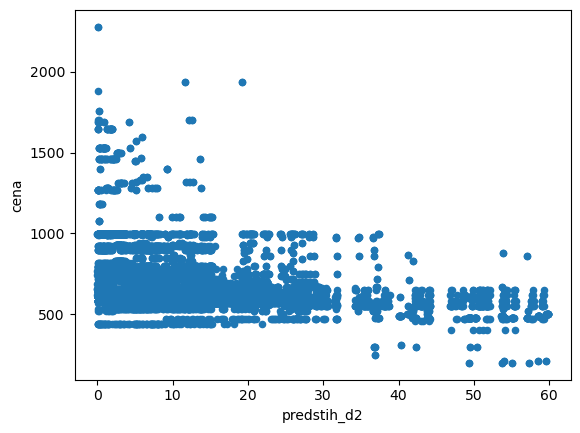

In [71]:
df[df['obdobi'].isin(spicka) & (df['predstih_d2'] <= 60)][['prodejce','predstih_d2','cena']].plot.scatter(x='predstih_d2', y='cena')

Opět strašlivá ad hoc úprava funkce pro generování grafu:

In [272]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    scatter=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti=[],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.series.bubble import BubbleSeries
    from highcharts_core.options.plot_options.scatter import ScatterOptions
    from highcharts_core.options.plot_options.bubble import BubbleOptions
    from highcharts_core.options.series.scatter import ScatterSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><script src="https://code.highcharts.com/highcharts-more.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script><style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()
    if len(scatter) > 0:
        categories = scatter[0].index.to_list()

    categories = [str(x) for x in categories]

    nastaveni["xAxis"] = {"categories": categories, "min": 0}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0

    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y = {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0,
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa

            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )

            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)
    if len(scatter) > 0:
        vykresleni(scatter, BubbleSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [284]:
spicka

['7-3', '5-2', '5-3', '7-4']

In [288]:
df['obdobi'].drop_duplicates().sort_values()

148297    1-0
14859     1-1
5536      1-2
5526      1-3
5512      1-4
5534      1-5
160388    2-0
5538      2-1
3957      2-2
3973      2-3
3977      2-4
5514      2-5
160426    3-0
3983      3-1
3951      3-2
3952      3-3
3950      3-4
7091      3-5
160447    4-0
3961      4-1
3959      4-2
8573      4-3
8578      4-4
8607      4-5
148574    5-0
1149      5-1
1121      5-2
1138      5-3
1119      5-4
1125      5-5
148010    6-0
1130      6-1
1120      6-2
1126      6-3
1137      6-4
147953    6-5
148244    7-0
8315      7-1
8300      7-2
13009     7-3
16194     7-4
19661     7-5
Name: obdobi, dtype: object

In [324]:
irozhlas_graf(scatter=[cd, rj, le], target='prgova_bubble', titulek='Jízdné Praha &#8596; Ostrava na začátku a konci víkendu', osaymin=0, podtitulek='Graf sleduje ceny jízdenek v páteční (8.00-16.00) a nedělní (12.00-18.00) špičce v závislosti na předstihu nákupu.', kredity=['Zdroj dat: e-shopy dopravců od 7. 11. do 25. 11. 2024. Vizualizace: iROZHLAS.cz','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika'])

Graf uložen.
